In [154]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize 
import skimage
from scipy.ndimage import zoom
import matplotlib.patches as patche
import pandas as pd
import PyQt5
%matplotlib inline

In [36]:
#import,
#reshape
#normalise
#crop sides
#downscale nano
#concatenate data (fuse)
#choose roi
#add to csv

In [163]:
#filepaths
folder_fp = 'train1/'
fp_hyper = folder_fp + 'hyper/reorder_272_3060_640_U16.bin'
fp_swir = folder_fp + 'swir/Reorder_288_3094_384_U16.bin'
fp_rgb_hyper = folder_fp + 'hyper/20220215132039_SCN_RGB.png'

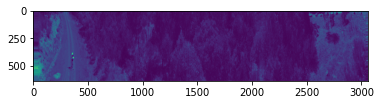

In [39]:
#load images
im_hyper = np.fromfile(fp_hyper,dtype='uint16')
im_hyper = (im_hyper-np.min(im_hyper))/(np.max(im_hyper)-np.min(im_hyper)) #nomralised
im_hyper = im_hyper.reshape([272,3060,640])

im_hyper =  np.transpose(im_hyper,(0,2,1))
plt.imshow(im_hyper[100,:,:])
plt.show()

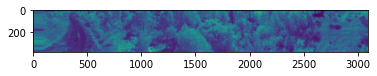

In [38]:
im_swir = np.fromfile(fp_swir,dtype='uint16')
im_swir = (im_swir-np.min(im_swir))/(np.max(im_swir)-np.min(im_swir)) #nomralised
im_swir = im_swir.reshape([288,3094,384])

im_swir =  np.transpose(im_swir,(0,2,1))
im_swir = np.fliplr(im_swir)

plt.imshow(im_swir[100,:,:])
plt.show()

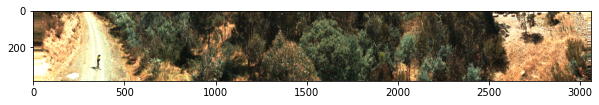

In [49]:
#downscale rgb image to do selection

rgb_swir = skimage.io.imread(fp_rgb_hyper)
rgb_resized = resize(rgb_swir, (rgb_swir.shape[0]*0.6,rgb_swir.shape[1]),anti_aliasing=True)
plt.figure(figsize=(10,10))
plt.imshow(rgb_resized)
plt.show()

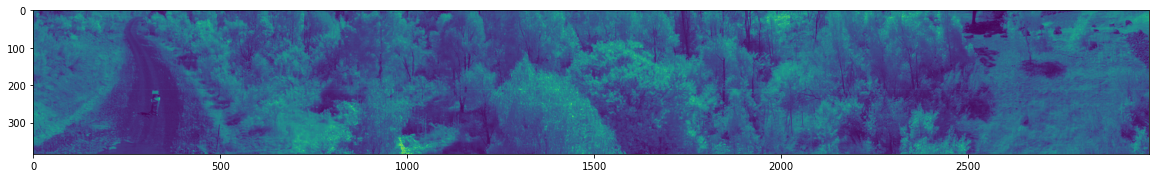

In [50]:
#take smaller crops of the same size from both\

#1 remove shit from sides of swir
plt.figure(figsize=(20,10))
swir = im_swir[:,:,90:im_swir.shape[2]-20]
plt.imshow(swir[100,:,:])

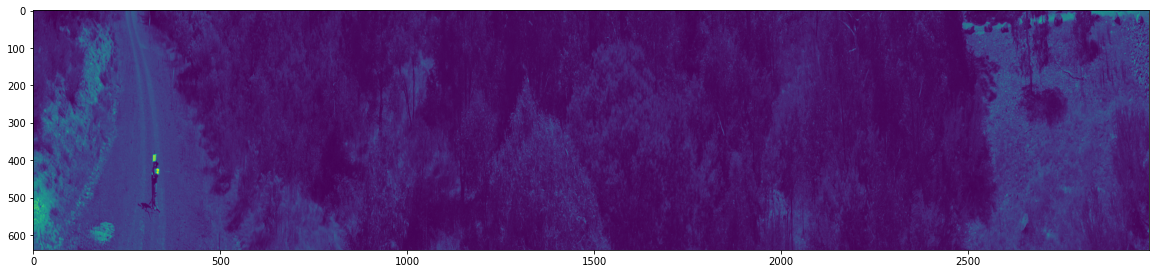

In [53]:
#2 clean up sides of hyper
plt.figure(figsize=(20,10))
hyp = im_hyper[:,:,35:im_hyper.shape[2]-41]
plt.imshow(hyp[100,:,:])

In [54]:
#ensure that htey are the same size, aligned etc
print('swir, hyp shape')
print(swir.shape, hyp.shape)

swir, hyp shape
(288, 384, 2984) (272, 640, 2984)


In [55]:
resized = zoom(hyp,(1,0.6,1))

In [58]:
print(swir.shape, resized.shape)

(288, 384, 2984) (272, 384, 2984)


In [60]:
##concatenate the data
SWIR_INDEX = 107 # which wavelength index to slice swir data at
swir_crop = swir[SWIR_INDEX:,:,:]  # take 95th wavelength and onwards, as before this just rubbish n noise
fuse = np.concatenate((resized,swir_crop),axis=0)

In [61]:
fuse.shape

(453, 384, 2984)

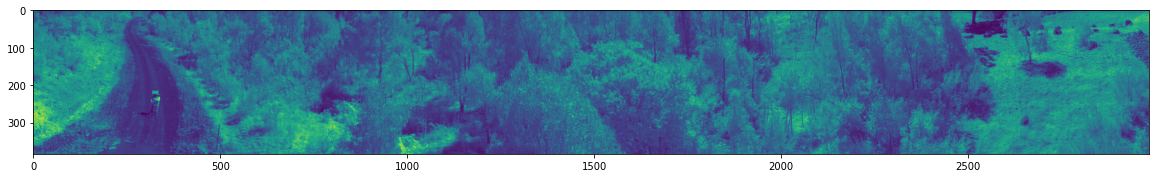

In [62]:
plt.figure(figsize=(20,10))
plt.imshow(fuse[300,:,:])

In [136]:
#initialise lists to hold training ROIs
#run this cell to clear the data or something
tree_trains = []
road_trains = []
dry_trains = []

%matplotlib qt

In [137]:
from matplotlib.widgets import EllipseSelector, RectangleSelector
import numpy as np
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/gallery/widgets/rectangle_selector.html


#training data for tree
def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    print(f"({x1}, {y1}) --> ({x2}, {y2})")
    # print(f"The buttons you used were: {eclick.button} {erelease.button}")
    roi = fuse[:,min(y1,y2):max(y1,y2),min(x1,x2):max(x1,x2)]
    tree_trains.append(roi)

fig, ax = plt.subplots(1,1,figsize=(20,10))
selectors = []
ax.imshow(rgb_resized)  # plot something
ax.set_title(f"Click and drag to draw a recntagle")
selectors.append(RectangleSelector(
    ax, select_callback,
    useblit=True,
    button=[1, 3],  # disable middle button
    minspanx=5, minspany=5,
    spancoords='pixels',
    interactive=True))
# fig.canvas.mpl_connect('key_press_event', keypress)
plt.show()

(1611, 204) --> (1732, 303)
(1345, 243) --> (1449, 339)
(2330, 40) --> (2434, 149)
(1853, 29) --> (1932, 105)
(643, 29) --> (759, 127)


In [138]:
#training data for road
def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    print(f"({x1}, {y1}) --> ({x2}, {y2})")
    # print(f"The buttons you used were: {eclick.button} {erelease.button}")
    roi = fuse[:,min(y1,y2):max(y1,y2),min(x1,x2):max(x1,x2)]
    road_trains.append(roi)

fig, ax = plt.subplots(1,1,figsize=(20,10))
selectors = []
ax.imshow(rgb_resized)  # plot something
ax.set_title(f"Click and drag to draw a recntagle")
selectors.append(RectangleSelector(
    ax, select_callback,
    useblit=True,
    button=[1, 3],  # disable middle button
    minspanx=5, minspany=5,
    spancoords='pixels',
    interactive=True))
# fig.canvas.mpl_connect('key_press_event', keypress)
plt.show()

(312, 114) --> (366, 182)
(314, 336) --> (369, 377)
(323, 182) --> (369, 221)
(388, 308) --> (427, 352)
(290, 23) --> (328, 59)


In [139]:
#training data for dry
def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    print(f"({x1}, {y1}) --> ({x2}, {y2})")
    # print(f"The buttons you used were: {eclick.button} {erelease.button}")
    roi = fuse[:,min(y1,y2):max(y1,y2),min(x1,x2):max(x1,x2)]
    dry_trains.append(roi)

fig, ax = plt.subplots(1,1,figsize=(20,10))
selectors = []
ax.imshow(rgb_resized)  # plot something
ax.set_title(f"Click and drag to draw a recntagle")
selectors.append(RectangleSelector(
    ax, select_callback,
    useblit=True,
    button=[1, 3],  # disable middle button
    minspanx=5, minspany=5,
    spancoords='pixels',
    interactive=True))
# fig.canvas.mpl_connect('key_press_event', keypress)
plt.show()

(2601, 169) --> (2670, 228)
(2618, 176) --> (2687, 235)
(2711, 210) --> (2758, 250)
(2638, 255) --> (2697, 304)
(2799, 166) --> (2888, 228)
(2728, 299) --> (2792, 345)


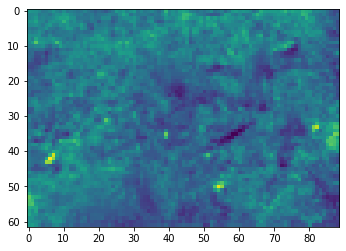

In [141]:
%matplotlib inline
plt.imshow(dry_trains[4][100,:,:])


In [151]:
len(dry_trains)

6

In [142]:
training = [] # list to convert into df

def spectra_list(roi,idx):
    tmp = []
    for i in range(roi[0,:,:].shape[1]):
        for j in range(roi[0,:,:].shape[0]):
            spectra = roi[:,j,i]
            tmp.append([idx,*spectra])
    roi_list = np.array(tmp)
    return roi_list


In [155]:
%matplotlib inline

In [156]:

for region in tree_trains:
    lst = spectra_list(region,1)
    training.append(lst)

for region in road_trains:
    lst = spectra_list(region,2)
    training.append(lst)

for region in dry_trains:
    lst = spectra_list(region,3)
    training.append(lst)

In [157]:
df = pd.DataFrame(np.concatenate(training), columns=[['class']+list(np.arange(0,fuse.shape[0]))])
df.head(5)

,class,0,1,2,3,4,5,6,7,8,...,443,444,445,446,447,448,449,450,451,452
0,1.0,5.439328e-19,0.004181,0.006040,0.009380,0.008166,0.010304,0.004641,0.010197,0.010345,...,0.000378,0.002200,0.001933,0.001800,0.001822,0.002222,0.001689,0.001111,0.000000,0.000000
1,1.0,-2.402528e-19,0.004220,0.004955,0.011948,0.007750,0.009179,0.006101,0.011982,0.008053,...,0.001178,0.001022,0.000400,0.001622,0.002667,0.001578,0.001822,0.002044,0.000311,0.000822
2,1.0,1.242640e-18,0.002457,0.006813,0.005372,0.008457,0.012652,0.010751,0.009409,0.010635,...,0.001067,0.001933,0.001889,0.001378,0.001733,0.003289,0.001289,0.001800,0.000978,0.001044
3,1.0,1.765130e-19,0.006122,0.004724,0.011593,0.007634,0.011686,0.007440,0.010687,0.010378,...,0.001622,0.001156,0.001578,0.001578,0.002511,0.002289,0.001956,0.000956,0.001667,0.000422
4,1.0,6.796139e-19,0.002498,0.006953,0.008399,0.006650,0.009457,0.008094,0.010202,0.009427,...,0.001511,0.001444,0.001311,0.001200,0.001422,0.002556,0.000000,0.000222,0.001511,0.000467


In [158]:
len(df)

165702

In [165]:
#divide into attributes and labels
train = df.iloc[:,1:454].values
labels = df.iloc[:,0].values #labels

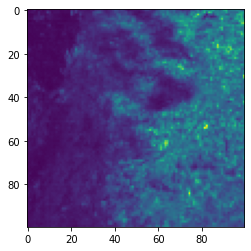

In [166]:
#choosing a test area to test training
test_area = fuse[:,100:200,2500:2600]
plt.imshow(test_area[40,:,:])

In [167]:
tmp = []
for i in range(test_area[0,:,:].shape[1]):
    for j in range(test_area[0,:,:].shape[0]):
        spectra = test_area[:,j,i]
        tmp.append(spectra)
test_area_list = np.array(tmp)
test_area_list = np.reshape(test_area_list,(test_area.shape[1],test_area.shape[2],test_area.shape[0]))

cover = np.zeros((test_area.shape[1],test_area.shape[2],3))
cover.shape

(100, 100, 3)

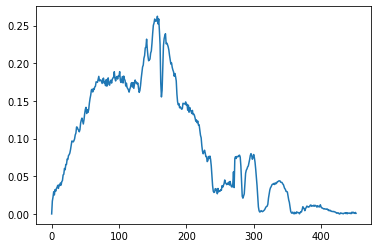

In [168]:
plt.plot(np.array(np.arange(test_area_list[40,40,:].shape[0])),test_area_list[40,40,:])

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [171]:
clf = RandomForestClassifier()
clf.fit(train,labels)

RandomForestClassifier()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


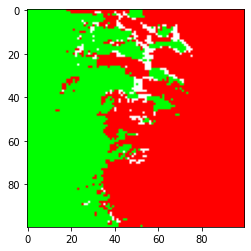

In [172]:
for i in range(cover.shape[1]):
    for j in range(cover.shape[0]):
        pred = clf.predict(test_area[:,j,i].reshape(1,-1))[0]
        if (pred == 1): 
            cover[j][i][0] = 0
            cover[j][i][1] = 255 #green for alive
            cover[j][i][2] = 0
        if (pred == 2): 
            cover[j][i][0] = 138
            cover[j][i][1] = 138 #grey  for road/gravel
            cover[j][i][2] = 138  
        if (pred == 3): 
            cover[j][i][0] = 255 #red dead
            cover[j][i][1] = 0
            cover[j][i][2] = 0

plt.imshow(cover)